# Introduction to Scikit-Learn

In [1]:


 # This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn Library.

What_we_are_going_to_cover = [

"0. An end -to-end Scikit learn workfolw.",
"1. Getting the data ready.",
"2. Choose the right estimator/algorith for our problems.",
"3. Fit the model/algorithm and use it to make predictions on our data",
"4. Evaluate a model.",
"5. Improve a model.",
"6. Save and Load a trained model.",
"7. Putting it all together!"]


In [2]:
What_we_are_going_to_cover

['0. An end -to-end Scikit learn workfolw.',
 '1. Getting the data ready.',
 '2. Choose the right estimator/algorith for our problems.',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluate a model.',
 '5. Improve a model.',
 '6. Save and Load a trained model.',
 '7. Putting it all together!']

## 0.An end-to-end Scikit-Learn Workflow.


In [3]:
# 1. Get the data ready
import pandas as pd
import numpy as np
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# Create X (features matrix) 

# In summary, you are splitting your dataset into two parts:

   # X, which contains all the independent variables (features) without the target column.
   # Y, which contains only the target column.

#This is a standard procedure in preparing data for supervised learning, where X is used to train the model, 
# and Y is what the model attempts to predict.
# This separation is a common practice when preparing data for machine learning, 
# as it allows you to train your model to learn the relationship between the input features (X) 
# and the target output (Y).

X = heart_disease.drop("target", axis=1)

# Create y (Labels)
Y = heart_disease["target"]

In [5]:
# 2. Choose the right model and hyperparameters
# clf is short for classifier
from sklearn.ensemble import RandomForestClassifier
clf  = RandomForestClassifier()

# we'll keep the default hyperparameters

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3 . Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2)



# Importing the train_test_split function
# from sklearn.model_selection import train_test_split
# This line imports the train_test_split function from the model_selection module of scikit-learn.
# The train_test_split function is a utility that helps you easily split your dataset
# into a training set and a testing set.

# Splitting the Dataset into Training and Testing Sets
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
# This line is where the actual splitting of the data occurs.
# train_test_split(X, Y, test_size=0.2) takes your features matrix X and your labels Y and splits 
# them into training and testing sets.
# The test_size=0.2 argument specifies that 20% of the data should be set aside for testing.
# This means that 80% of the data will be used for training the model.
# The function returns four subsets:
#    - X_train: The subset of your features used for training the model.
#    - X_test: The subset of your features used for testing the model.
#    - Y_train: The subset of your labels corresponding to X_train, used for training the model.
#    - Y_test: The subset of your labels corresponding to X_test, used for evaluating the model's performance.

# In simple terms, this process divides your dataset into two parts: 
# one part to train your machine learning model (the training set) and 
# another part to test its performance and see how well it generalizes to new, unseen data (the testing set).
# This is a fundamental practice in machine learning to avoid overfitting, 
# where a model performs well on the training data but poorly on new data.
# By evaluating the model on a separate testing set, 
# you get a better sense of its real-world performance.


In [7]:
clf.fit(X_train, Y_train);

# Fitting the model to the training data

# clf.fit(X_train, Y_train)
# This line is where the model 'learns' from the data.
# The 'fit' method is used to train the model using the training data.
# 'clf' is the instance of RandomForestClassifier we created earlier.

# X_train: This is the training data (features), which the model uses to learn.
# Y_train: These are the true labels for the training data.

# During the fitting process, the RandomForestClassifier will look at the X_train and Y_train data,
# and try to figure out the patterns or relationships between the features and the target label.
# This process involves the RandomForestClassifier building multiple decision trees,
# each looking at different aspects and combinations of the data,
# and then combining their insights to make more accurate predictions.

# Once the model is fitted, it can then be used to make predictions on new, unseen data.
# The 'fit' method is one of the most fundamental and first steps in the model building process 
# in machine learning.


In [8]:
# Make a prediction
Y_label = clf.predict(np.array([0,2,3,4]))

# this fails because the shape of the imput is not corect.
# we are puting in a array.



# Y_label = clf.predict(np.array([0,2,3,4]))
# This line is attempting to use the trained model to make a prediction.
# 'clf.predict()' is the method used to predict the label of new data using the trained model.

# However, this line raises an error because the shape of the input data does not match the 
# shape the model expects.
# The issue here is that we are passing a 1-dimensional array as input, 
# whereas the model expects the input to have the same number of features as the training data (X_train).

# In this case, the model was trained on a certain number of features (columns in X_train),
# but the input provided is a single array with only 4 values.
# Each value in this array is being interpreted as a separate input example rather than a set of 
# features for a single example.

# To fix this, the input data needs to be reshaped or reformatted to match the format of the training data.
# If you're trying to predict for one example, the input should be a 2-dimensional array 
# with one row for the example and columns matching the number of features the model was trained on.

# An example correction could be to reshape the array to have 1 row and the correct number of columns:
# Y_label = clf.predict(np.array([[0, 2, 3, 4]]))
# Note: The inner brackets create a 2D array with one row and four columns.


c:\Users\yisakg\desktop\sample_project_1\env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# Handling the Error in Prediction Attempt

# Error Message: 
# "Expected 2D array, got 1D array instead: array=[0. 2. 3. 4.]. 
# Reshape your data either using array.reshape(-1, 1) if your data has a single feature 
# or array.reshape(1, -1) if it contains a single sample."

# This error occurs because the input data provided to clf.predict() is not in the correct format.
# The RandomForestClassifier model expects the input data to be a 2-dimensional array, 
# but the provided data is a 1-dimensional array.

# In the context of the model, a 2D array represents a collection of samples, 
# where each sample has multiple features. 
# The model is trained on such an array, so it expects the same format for making predictions.

# To fix this error, the input data needs to be reshaped into a 2D array. 
# Since the intention is to predict a single sample with multiple features, 
# you should reshape the array to have 1 row (representing 1 sample) and multiple columns 
# (representing features).

# The correct way to reshape and make a prediction would be:
# Y_label = clf.predict(np.array([0, 2, 3, 4]).reshape(1, -1))
# Here, .reshape(1, -1) changes the shape of the array to have 1 row and as many columns as
# necessary to accommodate the data.

# This reshaping ensures that the data format matches what the model expects, 
# allowing the prediction method to work correctly.


In [9]:
# it has to look like this for it to work
# has to be a 2d array.
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,66,1,0,120,302,0,0,151,0,0.4,1,0,2
222,65,1,3,138,282,1,0,174,0,1.4,1,1,2
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0
217,63,1,0,130,330,1,0,132,1,1.8,2,3,3


In [10]:
Y_preds = clf.predict(X_test)
Y_preds

# Making Predictions on the Test Set

# Y_preds = clf.predict(X_test)
# This line uses the trained RandomForestClassifier (clf) to make predictions on the test data (X_test).
# The 'predict' method of clf is used to predict the labels for each sample in X_test.

# X_test contains the features of the unseen test data. 
# This data was set aside during the train-test split and was not used in training the model.
# The model will use the patterns it learned during training to predict the labels for this new data.

# The predictions made by the model are stored in the variable Y_preds.
# Y_preds will be a numpy array containing the predicted labels for each sample in X_test.

# Y_preds
# This line when executed in a Jupyter Notebook will display the contents of Y_preds.
# It shows the predictions made by the model for the test set.
# These predicted labels can be compared with the actual labels (Y_test) to evaluate the model's performance.

# By comparing Y_preds with Y_test, you can assess how well your model is performing.
# Common ways to evaluate classification models include accuracy, precision, recall, and the confusion matrix.


array([1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [11]:
# 4. Evaluate the Model
clf.score(X_train, Y_train)

# Evaluating the Model on the Training Set

# clf.score(X_train, Y_train)
# This line evaluates the performance of your RandomForestClassifier model on the training data.
# The 'score' method returns the accuracy of the model, which is the proportion of correct predictions.

# X_train and Y_train are the features and labels of the training set, respectively.
# The model was trained on this data, so this score tells you how well the model fits the training data.

# However, it's important to note that evaluating the model on the training data can be misleading.
# A high score on the training data might simply mean that the model has memorized the 
# training data (overfitting),
# rather than learning the underlying patterns in the data.

# A more accurate assessment of the model's performance is obtained by evaluating it on the 
# test set (X_test and Y_test),
# which consists of data that the model hasn't seen during training.
# This helps in understanding how well the model generalizes to new, unseen data.

# Generally, in machine learning, it's recommended to look at both the training score and the test score.
# A good model will have high scores on both the training and testing datasets.
# If the model performs well on the training data but poorly on the test data, 
# it's an indication that the model may be overfitting.


1.0

In [12]:
clf.score(X_test,Y_test)

# Evaluating the Model on the Test Set

# clf.score(X_test, Y_test)
# This line evaluates the performance of your RandomForestClassifier model on the test data.
# The 'score' method, in this case, returns the accuracy of the model for the test set,
# which is the proportion of correct predictions out of all predictions made on the test set.

# X_test and Y_test are the features and labels of the test set, respectively.
# The test set is crucial for evaluating the model because it consists of data that the model
# has not seen during training.
# This helps in understanding how well the model generalizes to new, unseen data.

# A high score on the test set indicates that the model not only learned the patterns in the training data,
# but it is also able to apply these patterns to make accurate predictions on new data.

# It's important to compare the model's performance on the training set (evaluated previously) and the test set.
# Ideally, the model should perform well on both sets. 
# A large discrepancy between training and test scores might indicate issues such as overfitting 
# (if the training score is much higher) 
# or underfitting (if the training score is too low compared to the test score).

# The accuracy obtained here gives a quick overview of how well the model performs, 
# but it's also useful to look at other metrics like precision, recall, F1 score, and confusion matrices
# for a more comprehensive evaluation, especially in cases where the dataset is imbalanced.


0.9016393442622951

In [13]:
# More ways to evaluate the model.

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

# This below will return the compararison of the test label and the predication label.
print(classification_report(Y_test, Y_preds))


# Generating a Classification Report for Model Evaluation

# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# This line imports various evaluation metrics from scikit-learn's metrics module,
# including classification_report, which we'll use to evaluate the model.

# Using classification_report to Evaluate the Model
# print(classification_report(Y_test, Y_preds))
# This line generates and prints out the classification report for your model based on the test data.
# The classification report provides detailed performance metrics for each class.

# Y_test: These are the true labels from the test set.
# Y_preds: These are the predicted labels by your model.

# The classification report includes several important metrics:
# - Precision: Measures the accuracy of positive predictions for each class.
# - Recall: Measures the ability of the model to find all the positive samples for each class.
# - F1-score: Provides a balance between precision and recall. It's a harmonic mean of the two.
# - Support: Indicates the number of actual occurrences of each class in the specified dataset.

# These metrics are provided for each class in your target variable and include averages,
# giving you a detailed overview of how well the model is performing for each type of classification.
# This detailed breakdown can help in identifying if the model is underperforming for any particular class 
# and assist in further refining the model or addressing any data imbalances.


              precision    recall  f1-score   support

           0       0.93      0.87      0.90        31
           1       0.88      0.93      0.90        30

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [14]:
confusion_matrix(Y_test,Y_preds)

# Generating a Confusion Matrix for Model Evaluation

# confusion_matrix(Y_test, Y_preds)
# This line generates the confusion matrix for your model based on the test data.
# A confusion matrix is a table often used to describe the performance of a classification model.

# Y_test: These are the true labels from the test set.
# Y_preds: These are the predicted labels by your model.

# The confusion matrix compares the actual target values with those predicted by the model,
# providing a detailed breakdown of:
# - True Positives (TP): Correctly predicted positive observations
# - True Negatives (TN): Correctly predicted negative observations
# - False Positives (FP): Incorrectly predicted positive observations (Type I error)
# - False Negatives (FN): Incorrectly predicted negative observations (Type II error)

# Each row of the matrix represents the instances in an actual class, 
# while each column represents the instances in a predicted class, or vice versa. 
# This setup allows you to see the types of errors (if any) your model is making.

# Interpreting the confusion matrix can provide insights into not only the overall performance of the model
# but also into how it performs on each individual class. It can be particularly useful to identify 
# any biases the model may have towards certain classes and can inform how you might improve the model,
# perhaps by providing more data for underrepresented classes or by tweaking the model itself.

# Generally, a high number of True Positives and True Negatives and low numbers of False Positives 
# and False Negatives
# are indicative of good model performance.


array([[27,  4],
       [ 2, 28]], dtype=int64)

In [15]:
accuracy_score(Y_test,Y_preds)

# Calculating the Accuracy Score for Model Evaluation

# accuracy_score(Y_test, Y_preds)
# This line calculates the accuracy of the model based on the test data.
# Accuracy is one of the most common metrics used to evaluate classification models.

# Y_test: These are the true labels from the test set.
# Y_preds: These are the predicted labels by your model.

# The accuracy score is the ratio of correct predictions to total predictions made:
# Accuracy = (True Positives + True Negatives) / Total Predictions

# It represents how often the classifier is correct overall across all classes.
# In simple terms, it answers the question, "Out of all the classifications, how many did the model get right?"

# While accuracy is a useful metric, it should be considered alongside other metrics like precision, recall, 
# and the F1 score, especially in scenarios where the data is imbalanced or when different types of 
# errors have different costs.

# A high accuracy score indicates that the model has a high rate of correctly predicting both
# positive and negative classes.
# However, don't rely solely on accuracy if the dataset is imbalanced (i.e., one class is much 
# more frequent than others).
# In such cases, the model might just predict the most common class most of the time and still 
# achieve high accuracy.

# Typically, after getting an overall sense of the model's performance through accuracy, 
# you would dive deeper into the performance details using the confusion matrix and classification report.


0.9016393442622951

In [16]:
# 5. Improve the Model.
# Try diferent amounts of the n_estimators
np.random.seed(42)
for i in range (10,100,10):
    print(f"Trying model with {i} estimators....")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train,Y_train)
    print(f"Model accuracy on the test set: {clf.score(X_test,Y_test) * 100:.2f}%")
    print("")      

# Improving the Model by Tuning n_estimators in RandomForestClassifier

# Trying different amounts of n_estimators
# np.random.seed(42)
# Setting a random seed ensures the results are reproducible.

# for i in range(10, 100, 10):
# This loop iterates through different values for 'n_estimators' starting from 10 up to 90, 
# increasing by 10 each time.
# 'n_estimators' in a RandomForestClassifier refers to the number of trees in the forest.

# print(f"Trying model with {i} estimators....")
# This prints out the number of estimators the model is using in the current iteration.

# clf = RandomForestClassifier(n_estimators=i).fit(X_train, Y_train)
# Here, a new RandomForestClassifier is created with the current number of estimators (i) 
# and fitted to the training data.
# This is done within the loop, so the classifier is retrained for each different value of 'n_estimators'.

# print(f"Model accuracy on the test set: {clf.score(X_test, Y_test) * 100:.2f}%")
# After fitting the model, this line prints out the accuracy of the classifier on the test data.
# Multiplying by 100 converts it into a percentage, and :.2f formats the number to two decimal places.

# print("")  
# This just prints a new line for better readability between each iteration's results.

# By iterating through different values of 'n_estimators', you can observe how changing the number of trees
# impacts the model's accuracy on the test set. 
# The goal is to identify the number of trees that provides the best trade-off between performance
# and computational efficiency.

# It's important to note that more trees in the forest doesn't always mean a better model. 
# After a certain point, increasing the number of trees may not significantly improve the 
# model's performance and can even 
# lead to longer training times. This experiment helps to find an optimal point or at least a
# range of 'n_estimators' 
# that offers good model accuracy without unnecessary computational cost.


Trying model with 10 estimators....
Model accuracy on the test set: 85.25%

Trying model with 20 estimators....
Model accuracy on the test set: 85.25%

Trying model with 30 estimators....
Model accuracy on the test set: 85.25%

Trying model with 40 estimators....
Model accuracy on the test set: 90.16%

Trying model with 50 estimators....
Model accuracy on the test set: 86.89%

Trying model with 60 estimators....
Model accuracy on the test set: 83.61%

Trying model with 70 estimators....
Model accuracy on the test set: 88.52%

Trying model with 80 estimators....
Model accuracy on the test set: 88.52%

Trying model with 90 estimators....
Model accuracy on the test set: 88.52%



In [17]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pk1", "wb"))

# Saving the Trained Model for Later Use

# import pickle
# 'pickle' is a Python module used to serialize and deserialize Python objects.
# Serialization is the process of converting a Python object into a byte stream,
# and deserialization is the reverse process. It's useful for saving models and other data structures.

# pickle.dump(clf, open("random_forest_model_1.pk1", "wb"))
# This line saves the trained RandomForestClassifier (clf) to a file.

# clf: This is the trained RandomForestClassifier model that you want to save.

# open("random_forest_model_1.pk1", "wb"): This opens a file named 'random_forest_model_1.pk1'
#  in binary write mode ('wb').
# If the file doesn't exist, it will be created. If it does exist, it will be overwritten.

# The 'dump' function of pickle is used to serialize the 'clf' object and write it to the file.
# This saved model can be loaded later to make predictions without needing to retrain the model.

# Saving the model is particularly useful if the training process is time-consuming,
# or if you want to deploy the model for use in applications, share it with others, or simply keep 
# a version of the model 
# that you can return to later.

# Note: It's important to remember that the version of scikit-learn (or any other libraries used) 
# should be the same when you save the model and when you load it, as changes in the library versions 
# might not be compatible with the model file.



In [18]:
#lets load the model. "rb" stands for read binaries
loded_model = pickle.load(open("random_forest_model_1.pk1", "rb"))

# score the model .

loded_model.score(X_test,Y_test)

# Loading the Saved Model and Evaluating It

# Loading the model
# loded_model = pickle.load(open("random_forest_model_1.pk1", "rb"))
# This line loads the previously saved model into the variable 'loaded_model'.
# 'pickle.load()' is used to deserialize the object, converting the byte stream back into a Python object.

# open("random_forest_model_1.pk1", "rb"): This opens the file named 'random_forest_model_1.pk1' 
# in binary read mode ('rb').
# The file must exist in the directory you're working in, or you should provide the correct path to the file.

# "rb" stands for "read binary", which is necessary because the model was saved in a binary format.

# Once loaded, 'loaded_model' is essentially a clone of the 'clf' object that was saved earlier.
# It retains all the properties, parameters, and learned patterns of the original trained model.

# Scoring the loaded model
# loaded_model.score(X_test, Y_test)
# After loading the model, you might want to confirm that it's still performing as expected.
# This line uses the 'score' method to evaluate the loaded model's accuracy, just like you did with 
# the original 'clf' model.

# X_test and Y_test are the same test set features and labels used to evaluate the original model.
# This line effectively gives you the accuracy of the model on the test set, 
# allowing you to verify that the model has been loaded correctly and is functioning as expected.

# Using 'loaded_model.score()' is a quick way to ensure that the deserialization process 
# has worked correctly and that the model is ready to be used for predictions or further evaluation.

# This process is particularly useful in operational settings where you might train a model in one
# script or notebook,
# save it, and then load it in a different script, application, or system to make predictions.


0.8852459016393442

In [19]:
What_we_are_going_to_cover

['0. An end -to-end Scikit learn workfolw.',
 '1. Getting the data ready.',
 '2. Choose the right estimator/algorith for our problems.',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluate a model.',
 '5. Improve a model.',
 '6. Save and Load a trained model.',
 '7. Putting it all together!']

In [20]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. getting our data ready to be used with machine learning

Three main things we have to do.

1.Split the data into features and labels (usually 'x' and 'y')

2.Filling (also called inputing) or disregarding missing values

3.Converting non-numerical values to numerical values (also called feature encoding)

In [21]:
heart_disease.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# lets drop target or remove target from the table

x=heart_disease.drop("target", axis=1)

In [23]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [24]:
# the y axis will be target 
y=heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [25]:
# Split the data into training and test sets 

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2)

In [26]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [27]:
# 242 came from spliting
# 13 came from the number of coulmns
x.shape[0] * 0.8

242.4

In [28]:
len(heart_disease)

303

### 1.1  Make sure its all numerical 

In [29]:
car_sales =pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [30]:
len(car_sales)

1000

In [31]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [32]:
# Split into X/Y

X = car_sales.drop("Price", axis=1)
Y = car_sales["Price"]

# Split into training and test

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)


In [33]:
# Build machine learning model

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, Y_train)
model.score(X_test,Y_test)

# will get Value error if you do not convert  strings into int.

ValueError: could not convert string to float: 'Toyota'

In [34]:
# Here we convert our data in to numbers
# Turn the catagories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

catagorical_features = ["Make", "Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,catagorical_features)],remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [35]:
# Put it in a data frame
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [36]:
# A second way to change to number

dummies = pd.get_dummies(car_sales[["Make", "Colour","Doors"]])
dummies 

# A second way to change to number

# dummies = pd.get_dummies(car_sales[["Make", "Colour","Doors"]])
# This line creates dummy variables for categorical data in the car_sales DataFrame.
# 'pd.get_dummies()' is a function from the pandas library that converts categorical variable(s)
# into dummy/indicator variables.

# What are dummy variables?
# - Dummy variables are binary (0 or 1) columns created to represent each unique value in a 
# categorical variable.
# - For each unique category in the variable, a new column is created where 1 indicates the
# presence of the category and 0 indicates the absence.

# car_sales[["Make", "Colour", "Doors"]]
# - This part is selecting the 'Make', 'Colour', and 'Doors' columns from the car_sales DataFrame.
# - These are typically categorical columns where 'Make' might be car brands, 'Colour' could be the 
# color of the car, 
#   and 'Doors' the number of doors (which might be treated as categorical, e.g., '2-door', '4-door', etc.).

# dummies = ...
# - The resulting dummy variables are stored in a new DataFrame called 'dummies'.
# - This DataFrame now contains several columns, each representing a unique value from the original
# columns as binary indicators.

# dummies
# - This line, when executed, displays the DataFrame 'dummies'.
# - It's useful to visualize the new dummy variables to understand how the original categorical 
# data has been transformed.

# Why use dummy variables?
# - Many machine learning models require numerical input and do not handle categorical data natively.
# - Dummy variables allow for the representation of categorical data in a binary, numerical format
# that models can understand.
# - It avoids the issue of assigning ordinal numbers to categories which might lead the model to assume 
# a natural order among categories.

# Note: After creating dummy variables, it's important to consider multicollinearity, 
# which can occur due to the dummy variable trap (one dummy variable can be predicted from others).
# A common practice is to drop one dummy column for each original categorical variable to avoid this issue.


,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [37]:
# Let's refit the model

np.random.seed(42)
X_train,X_test,Y_train,Y_test = train_test_split(transformed_X,Y, test_size=0.2)

model.fit(X_train,Y_train)

RandomForestRegressor()

In [38]:
model.score(X_test,Y_test)

0.3235867221569877

## 1.2  Dealing with missing data

1. Fill them with some value (also known as imputaion)
2.  Remove the sample with missing data altogether

In [39]:
# import car sales missing data

car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [40]:
# this code is intended to give you a summary count of all missing (NaN) 
# values in each column of the car_sales_missing DataFrame.

car_sales_missing.isna().sum()


Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [41]:
# Create X & Y

x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [42]:
#  Let's try and conver them into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

catagorical_features = ["Make", "Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,catagorical_features)],remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

### 1: Fill Missing Data with Pandas

In [43]:
# code is using the fillna() method from pandas to handle missing values in a DataFrame called car_sales_missing. Here's what each line is doing:

# Filling "Make" Column: It replaces all missing (NaN) values in the "Make" column with the string "missing".

# Filling "Colour" Column: It replaces all missing (NaN) values in the "Colour" column with the string "missing".

# Filling "Odometer (KM)" Column: It replaces all missing (NaN) values in the "Odometer (KM)" column with 
# the mean (average) of the existing values in that column.

# Filling "Doors" Column: It replaces all missing (NaN) values in the "Doors" column with the number 4.

# In all cases, the inplace=True parameter updates the DataFrame directly, meaning it changes the original
# car_sales_missing DataFrame rather than creating a new one. This is a common way to handle missing
# data by assigning default or calculated values to ensure the dataset is complete for analysis 
# or further processing.


# Fill the "make " column

car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column

car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer (KM)" column

car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column

car_sales_missing["Doors"].fillna(4, inplace=True)

In [44]:
# Check our data frame again

# Price column is left out in purpose as its the one we are trying to predict.
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [45]:
# remove rows with missing price value
car_sales_missing.dropna(inplace=True)
#  The code car_sales_missing.dropna(inplace=True) removes all rows in the car_sales_missing 
# DataFrame that contain any missing values (NaN) and updates the DataFrame in place.

In [46]:
# we use .isna() and . sum() to get the sum of all missing values
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [47]:
len(car_sales_missing)

950

In [48]:
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [49]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

catagorical_features = ["Make", "Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,catagorical_features)],remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

### Option 2 : Fill missing values with Sickit-Learn

In [50]:
# import dataframe which has missing vales and inspect top five values.
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [51]:
# we use .isna() and . sum() to get the sum of all missing values
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [52]:
# Here we are dropping na values in the Price column 
# Then recaluculate how much are missing.
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [53]:
# split into X & Y 
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [54]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Imputer are used here to fill missing data
# Setup imputers: one for categorical, one for door number, and one for numerical features
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")  # Fills missing categorical values with 'missing'
door_imputer = SimpleImputer(strategy="constant", fill_value=4)  # Fills missing door values with '4'
num_imputer = SimpleImputer(strategy="mean")  # Fills missing numerical values with mean of the column

# Define feature lists for different data types
cat_features = ["Make", "Colour"]  # Categorical feature names
door_feature = ["Doors"]  # Door feature name
num_features = ["Odometer (KM)"]  # Numerical feature names

# Create a ColumnTransformer to apply each imputer to the correct features
# ColumnTransformer takes a list of multiple transformers 
# Each element of the list is a tuple, specifying the transformer to apply to a specific subset of columns. 
# This is powerful because it allows different treatments for different types of data
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),  # Apply categorical imputer to cat_features
    ("door_imputer", door_imputer, door_feature),  # Apply door imputer to door_feature
    ("num_imputer", num_imputer, num_features)  # Apply numerical imputer to num_features
])

# Assume X is your dataframe
# Apply the ColumnTransformer to the data
filled_X = imputer.fit_transform(X)  # Imputes missing values in X
filled_X


array([['Honda', 'White', 4, 35431.0],
       ['BMW', 'Blue', 5, 192714.0],
       ['Honda', 'White', 4, 84714.0],
       ...,
       ['Nissan', 'Blue', 4, 66604.0],
       ['Honda', 'White', 4, 215883.0],
       ['Toyota', 'Blue', 4, 248360.0]], dtype=object)

In [55]:
# lets check the filled column 
car_sales_filled = pd.DataFrame(filled_X,
                              columns=["Make","Colour","Doors", "Odometer (KM)"])

car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431.0
1,BMW,Blue,5,192714.0
2,Honda,White,4,84714.0
3,Toyota,White,4,154365.0
4,Nissan,Blue,3,181577.0


In [56]:
# we can see here that we have no missing values
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [57]:
# Here we convert our data in to numbers


from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

catagorical_features = ["Make", "Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,catagorical_features)],remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

array([[0.0, 1.0, 0.0, ..., 1.0, 0.0, 35431.0],
       [1.0, 0.0, 0.0, ..., 0.0, 1.0, 192714.0],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 84714.0],
       ...,
       [0.0, 0.0, 1.0, ..., 1.0, 0.0, 66604.0],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 215883.0],
       [0.0, 0.0, 0.0, ..., 1.0, 0.0, 248360.0]], dtype=object)

In [58]:
# Now that we have filled missing data and convertedd to numbers 
# lets fit a model.

np.random.seed(42)
#This line sets the seed for NumPy's random number generator to '42', 
# ensuring that the results are reproducible.
#(and the train-test split) will produce the same results each run.
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_X,
                                                   Y,
                                                   test_size=0.2)

model= RandomForestRegressor()
model.fit(X_train,Y_train)
model.score(X_test, Y_test)


0.3235867221569877

In [59]:
len(car_sales_filled), len(car_sales)

(1000, 1000)

## Choosing the right model for your problem.

Somethings to note:

* SKlearn refers to machine learning models, algorithms as estimators.
* Classification problem - predicting a catagory (heart disease or not)
* sometimes you will see clf(short for classifier) used as a classification estimator
* Regrassion problem - predicting a number(selling price of a car)
* Clustering: Groups similar items into clusters to uncover inherent structures; for example, customer  segmentation in marketing to target customers with similar buying habits.
* Dimensionality Reduction: Reduces the number of variables in high-dimensional data, improving visualization and efficiency; for example, reducing features in a dataset for facial recognition to improve model performance and reduce complexity.
* Sklearn machine learning map:  https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### Picking a machine learning
Let"s use the California Housing dataset.

In [60]:
# Get California Housing dataset
# The code fetches the California Housing dataset from scikit-learn and stores it in the variable housing,
# providing data for machine learning tasks related to housing prices.
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [61]:
# Lets change it into a dataframe
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [62]:
# Lets add a target column 
housing_df["MedHouseVal"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [63]:
# Import algorithm using map
# we will need to experiment to find the best algorithm

from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("MedHouseVal", axis= 1)
Y = housing_df["MedHouseVal"]  # median house price in 100,000s

# Split the data into train and test sets
X_train, X_test, Y_train,Y_test = train_test_split(X,Y, test_size=0.2)

# Instantiate and fit the model(on the training set)
model = Ridge()
model.fit(X_train,Y_train)

# Check the score of the model(on teh test set)
model.score(X_test,Y_test)

0.5758549611440126

In [64]:
# Import algorithm using map
# we will need to experiment to find the best algorithm
# lets try another algoritm Lasso

from sklearn.linear_model import Lasso

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("MedHouseVal", axis= 1)
Y = housing_df["MedHouseVal"]  # median house price in 100,000s

# Split the data into train and test sets
X_train, X_test, Y_train,Y_test = train_test_split(X,Y, test_size=0.2)

# Instantiate and fit the model(on the training set)
model = Lasso()
model.fit(X_train,Y_train)

# Check the score of the model(on teh test set)
model.score(X_test,Y_test)

0.2841671821008396

When the algorithem we selected does not work or the score is not what we are looking for.
We can always try a different model

We can try ensembel model 

In scikit-learn, an ensemble model combines multiple machine learning models, like decision trees or classifiers, to improve prediction accuracy, stability, and robustness compared to using a single model.

In [65]:
 # Import the  RandRandomForestRegressor model from the ensemble module
from sklearn.ensemble import  RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data 
X = housing_df.drop("MedHouseVal", axis=1)
Y = housing_df["MedHouseVal"]

# Split into train and test

X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size =0.2)

# Create random forest model.
model = RandomForestRegressor()
model.fit(X_train, Y_train)

# check the score of the model (on the test set)
model.score(X_test, Y_test)



0.8065734772187598

## Picking a machine learnnig model for a classification problem

In [66]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [67]:
len(heart_disease)

303

Going through the map we find that we can use LinearSVC 

In [68]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# make the data

X = heart_disease.drop("target", axis = 1)
Y = heart_disease["target"]

# split the data

X_train, X_test,Y_train, Y_test  = train_test_split(X,Y, test_size = 0.2)

# Instantiate LinearSVC 

Clf = LinearSVC(max_iter=100000)
clf.fit(X_train,Y_train)

# evaluate the LinearSVC

clf.score(X_test,Y_test)
    

0.8688524590163934

In [69]:
# Lets compare it with another classifier
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data

X = heart_disease.drop("target", axis = 1)
Y = heart_disease["target"]

# split the data

X_train, X_test,Y_train, Y_test  = train_test_split(X,Y, test_size = 0.2)

# Instantiate Random Forest Classifier

Clf = RandomForestClassifier()
clf.fit(X_train,Y_train)

# evaluate the RandomForestClassifier
clf.score(X_test,Y_test)
    

0.8688524590163934

Note:
1. If you have structured data, use Ensemble methods.
2.  If you have unstructured data, use deep learning or transfer learning.

##  Fit the model on our data and use it to make pridictions

Note Diferent names for X and Y:
* 'X' = features, feature variables data
* 'Y'= labels, targets, target variables

In [70]:
# Import the RandomForestClassifer estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data

X = heart_disease.drop("target", axis = 1)
Y = heart_disease["target"]

# split the data

X_train, X_test,Y_train, Y_test  = train_test_split(X,Y, test_size = 0.2)

# Fit the model to the data

Clf = RandomForestClassifier()
clf.fit(X_train,Y_train)

# evaluate the RandomForestClassifier

clf.score(X_test,Y_test)
    

0.8688524590163934

In [71]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [72]:
Y.head()


0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

###  Make predictions using a machine learning model.

2 ways to make predictions:

1.predict()
2.predict_proba()


In [73]:
# Use a trained model to make predictions
clf.predict(np.array([1,3,4,5,6]))  # this does not work

# "Expected 2D array, got 1D array instead:\narray={}.\n"
#    "Reshape your data either using array.reshape(-1, 1) if "
#          "your data has a single feature or array.reshape(1, -1) "
#           "if it contains a single sample.".format(array)

c:\Users\yisakg\desktop\sample_project_1\env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 3. 4. 5. 6.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# We have to use the same format , it has to be a 2d array.
# we can use the X_test as our mode has not seen this data and is a same format.
clf.predict(X_test)

In [ ]:
# here is the reults from our data we had split earlier

np.array(Y_test)

In [ ]:
# Compare predictions to the truth labels to evaluate the model.
Y_preds = clf.predict(X_test)
np.mean(Y_preds == Y_test)


In [ ]:
# the above result is thte same as the score we got earlier
clf.score(X_test,Y_test)

In [ ]:
# another way to score the model.
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_preds)


### Make prediction with predict_proba()

In [ ]:
# Use the classifier (clf) to predict probabilities of classification labels for the first 5 samples in X_test
# The clf.predict_proba() function returns the predicted probabilities for each class
predicted_probabilities = clf.predict_proba(X_test[:5])

# Display the predicted probabilities
predicted_probabilities


In [ ]:
# lets predict it the other way
clf.predict(X_test[:5])

In [ ]:
X_test[:5]

In [ ]:
heart_disease["target"].value_counts()

### predict() can also be used for regression models.


In [ ]:
housing_df.head()


In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create the data

X = housing_df.drop("MedHouseVal", axis=1)
Y = housing_df["MedHouseVal"]


# Split into training ans test sets.

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

# Create the model instance
# Create a Random Forest Regressor model with 10 decision trees
# The RandomForestRegressor is an ensemble learning method that builds a forest of decision trees
# n_estimators is a hyperparameter that determines the number of decision trees in the forest
# Setting n_estimators=10 means the model will use 10 decision trees for making predictions

model = RandomForestRegressor(n_estimators=100) # default n_estimatrors is = 100


# Train (fit) the RandomForestRegressor model on the training data
# X_train: Input features of the training data
# Y_train: Target values corresponding to the training data

model.fit(X_train, Y_train)

# Use the trained RandomForestRegressor model to make predictions on the test data
# X_test: Input features of the test data
# Y_preds: Predicted target values based on the input features

Y_preds = model.predict(X_test)


In [ ]:
# Display the first 10 predicted target values from the RandomForestRegressor model
# Y_preds[:10]: Subset of predicted target values for the first 10 samples in the test data
Y_preds[:10]


In [ ]:
# Convert the true target values of the first 10 samples in the test data to a NumPy array
# np.array(Y_test[:10]): Creating a NumPy array from the true target values for comparison
np.array(Y_test[:10])


In [ ]:
len(Y_preds)

In [ ]:
len(Y_test)

In [ ]:
# Use the mean_absolute_error function to calculate the mean absolute error (MAE)
# MAE is a metric that measures the average absolute difference between the true and predicted values
# It provides a straightforward way to understand the average magnitude of errors in the predictions
# Lower MAE indicates better model performance, with 0 being a perfect match
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test, Y_preds)


In [ ]:
housing_df["MedHouseVal"]

In [ ]:
What_we_are_going_to_cover

## Evaluating a machine learning model 

Three ways to evaluate Scikit-learn models:

     1. Estimator's built-in `score()`  method
     2. The `scoring` parameter
     3. Problem-specific metric functions.


You can find more information here: https://scikit-learn.org/stable/modules/model_evaluation.html


### Evaluating a model with the `score` method

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)


# Create X & Y

X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]


# Create train/test

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

# Instantiate Random Forest Classifier

clf = RandomForestClassifier(n_estimators=100)


# Fit classifer to training data
clf.fit (X_train,Y_train)

In [ ]:
# The highest value for the .score() method is 1.0 the lowest is 0.0
# The model is geting a 100% score as it has seen all the training data.
clf.score(X_train,Y_train)

In [ ]:
# this will be the score on the unseed data 
clf.score(X_test,Y_test)

Lets try the `score()` method  on a regression problem

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create the data

X = housing_df.drop("MedHouseVal", axis=1)
Y = housing_df["MedHouseVal"]


# Split into training ans test sets.

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

# Create the model instance
# Create a Random Forest Regressor model with 10 decision trees
# The RandomForestRegressor is an ensemble learning method that builds a forest of decision trees
# n_estimators is a hyperparameter that determines the number of decision trees in the forest
# Setting n_estimators=10 means the model will use 10 decision trees for making predictions

model = RandomForestRegressor(n_estimators=100) # default n_estimatrors is = 100


# Train (fit) the RandomForestRegressor model on the training data
# X_train: Input features of the training data
# Y_train: Target values corresponding to the training data

model.fit(X_train, Y_train)




In [ ]:
# Evaluate the performance of the regression model 'model' on the test dataset.
# 'X_test' contains the test features, and 'Y_test' contains the true labels.
# For regression algorithms, the default metric used by 'score()' is R-squared (r_squared).
# R-squared values range from 0.0 (worst) to 1.0 (best), indicating the proportion of 
# variance for the dependent variable that's explained by the independent variables in the model.
model.score(X_test, Y_test)


## Evaluating a model using the `score` parameter

In [ ]:
# Import necessary libraries for machine learning
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Set a random seed for reproducibility of results
np.random.seed(42)

# Prepare the feature matrix (X) by dropping the target variable column
X = housing_df.drop("MedHouseVal", axis=1)  # 'MedHouseVal' is the target variable

# Prepare the target vector (Y) by selecting only the target column
Y = housing_df["MedHouseVal"]

# Split the dataset into training and testing sets
# 80% of the data is used for training and 20% for testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Initialize the RandomForestRegressor model
# Setting n_estimators to 100, specifying the number of trees in the forest
clf = RandomForestRegressor(n_estimators=100)  # Default n_estimators is 100

# Fit the RandomForestRegressor model on the training data
# This step involves the model learning the relationship between features and the target variable
clf.fit(X_train, Y_train)

# After this, clf is now a trained RandomForestRegressor model
# It can be used to make predictions and evaluate its performance on unseen data


In [ ]:
# Evaluate the accuracy of the classifier 'clf' on the test dataset
# 'X_test' contains the test features, and 'Y_test' contains the true labels.
# The 'score' method compares the model's predictions with the true labels 
# to calculate the accuracy (for classification) or R^2 score (for regression).
clf.score(X_test, Y_test)


In [ ]:
# Perform cross-validation on the classifier 'clf' using the dataset 'X' and labels 'Y'.
# The 'cross_val_score' function splits 'X' and 'Y' into multiple subsets (folds), 
# and for each fold, it trains the classifier 'clf' on the fold's training set 
# and evaluates its performance on the fold's test set.
# Here, 'cv=5' specifies that the data should be split into 5 folds, 
# providing a balance between training and testing each subset.
# This approach helps in assessing the model's effectiveness and 
# generalization capability over different data samples.
cross_val_score(clf, X, Y, cv=5)


In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score

# Set a random seed for reproducibility of the experiment
np.random.seed(420)

# Evaluating the RandomForestRegressor model on a single training/test split
# This gives us an idea of how the model performs on this particular partition of the data
clf_single_score = clf.score(X_test, Y_test)

# Evaluating the model using 5-fold cross-validation
# This method splits the entire dataset into 5 parts, trains the model 5 times using 4 parts as training data
# and the remaining part as testing data each time, and calculates the score for each iteration.
# Taking the mean of these scores gives us a more robust estimate of the model's performance.
clf_cross_val_score = np.mean(cross_val_score(clf, X, Y, cv=5))

# Compare the two scores to understand how the model's performance might vary
# between a single split and across different folds of cross-validation.
# A significant difference might indicate the model's sensitivity to the data partitioning.
(clf_single_score, clf_cross_val_score)


In [ ]:
# Scoring parameter set to None by default
# Default scoring parameter of classifier = mean accuracy

# Perform cross-validation on the classifier 'clf' using the dataset 'X' and labels 'Y'.
# The 'cross_val_score' function with 'scoring=None' defaults to the classifier's 
# standard scoring method, which for most classifiers is mean accuracy.
# 'cv=5' specifies that the data is split into 5 subsets (folds).
# In each of the 5 iterations, the classifier is trained on 4 folds and tested on the remaining fold.
# This provides a robust evaluation of the classifier's performance across different subsets of the data.
cross_val_score(clf, X, Y, cv=5, scoring=None)


### Classification model evaluation metrics

1. Accuracy 
2. Area under ROC curve
3. Confusion matrix
4. Classification report


**Accuracy**

In [ ]:
# Import necessary functions and models from scikit-learn
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Ensuring reproducibility of results by setting a random seed
np.random.seed(42)

# with 'target' as the column indicating the presence or absence of heart disease.
# Preparing the feature matrix (X) and target vector (Y)
X = heart_disease.drop("target", axis=1)  # Features: all columns except 'target'
Y = heart_disease["target"]  # Target: the 'target' column

# Instantiate a RandomForestClassifier with 50 trees
clf = RandomForestClassifier(n_estimators=50)

# Perform 5-fold cross-validation to evaluate the model
# The function cross_val_score() automatically splits the data into folds,
# trains the model on the training folds, and tests it on the testing fold for each split.
# cv=5 specifies that the data should be split into 5 parts for cross-validation.
cross_val_scores = cross_val_score(clf, X, Y, cv=5)

# cross_val_scores now contains the accuracy scores of the model for each fold.
# You can further analyze these scores (e.g., calculate the mean) to estimate the model's performance.


In [ ]:
# Calculate the mean of the cross-validation scores
mean_cross_val_score = np.mean(cross_val_scores)

# Print the mean cross-validation score
print("Mean cross-validation score:", mean_cross_val_score)


In [ ]:
print(f"Heart Disease Classifier Cross-validated Accuracy: {np.mean(cross_val_scores) * 100:.2f}%")


**Area under the reciever operating characteristic curve(AUC/ROC)**


* Area under curve (AUC)
*ROC curve

ROC curves are a comparison of a model's true postive rate (tpr) versus a model false
positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0 
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [ ]:
# Splitting the dataset into training and testing sets.
# 'train_test_split' randomly divides the data into two parts:
# 1. Training set (X_train and Y_train) used for the model to learn from.
# 2. Testing set (X_test and Y_test) used to evaluate the model's performance.
# The 'test_size=0.2' argument specifies that 20% of the data should be held out for testing,
# meaning the remaining 80% is used for training the model.
# This function ensures that your model is tested on unseen data, simulating real-world predictions.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# After this step, you have four subsets of data:
# X_train: The feature variables used for training.
# Y_train: The target variable corresponding to X_train, used for training.
# X_test: The feature variables set aside for testing the model.
# Y_test: The target variable corresponding to X_test, used to evaluate model performance.

In [ ]:
from sklearn.metrics import roc_curve

# Fit the classifier to the training data
# This step trains the model using the features (X_train) and the target (Y_train).
clf.fit(X_train, Y_train)

# Make predictions with probabilities on the test set
# The predict_proba method returns the probability estimates for all classes,
# which is useful for evaluating the classifier's performance through metrics like ROC.
Y_probs = clf.predict_proba(X_test)

# Display the first 10 prediction probabilities and the total number of predictions
Y_probs[:10], len(Y_probs)


In [ ]:
# Extract positive class probabilities
# The [:,1] indexing selects the probabilities of the positive class (usually '1') for all instances.
# This is typically required for metrics like ROC AUC, where the focus is on the performance concerning the positive class.
Y_probs_positive = Y_probs[:, 1]

# Display the first 10 positive class probabilities
Y_probs_positive[:10]


In [ ]:
from sklearn.metrics import roc_curve

# Calculate False Positive Rate (fpr), True Positive Rate (tpr), and thresholds
# The roc_curve function computes the Receiver Operating Characteristic (ROC) curve,
# which illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.
# It's a plot of the True Positive Rate (tpr) against the False Positive Rate (fpr) at various threshold settings.
fpr, tpr, thresholds = roc_curve(Y_test, Y_probs_positive)

# Display the False Positive Rates (fpr)
# The fpr array contains the false positive rates for each threshold used to compute the ROC curve.
# A false positive rate indicates how often the model incorrectly classifies a negative observation as positive.
fpr


In [ ]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots the Receiver Operating Characteristic (ROC) curve.
    
    The ROC curve visualizes the performance of a classification model by plotting
    the true positive rate (TPR) against the false positive rate (FPR) at various threshold levels.
    
    Parameters:
    - fpr: Array of false positive rates.
    - tpr: Array of true positive rates.
    """
    
    # Plot the ROC curve using the FPR and TPR values
    plt.plot(fpr, tpr, color="orange", label="ROC")
    
    # Plot a diagonal dashed line representing a no-skill classifier (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="No Skill")
    
    # Add labels and title for clarity
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    
    # Display the legend to differentiate between the ROC curve and the baseline
    plt.legend()
    
    # Show the plot
    plt.show()

# Example usage of the function (assuming fpr and tpr are defined from a model's predictions)
plot_roc_curve(fpr, tpr)


In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate the ROC AUC Score
# The roc_auc_score function computes the area under the ROC curve,
# which represents the model's ability to discriminate between positive and negative classes.
# A higher score indicates better performance, with 1.0 representing a perfect model.
roc_auc = roc_auc_score(Y_test, Y_probs_positive)

# Print the ROC AUC score to evaluate the model
print(f"ROC AUC Score: {roc_auc}")


In [ ]:
# Plot perfect ROC cueve and AUC score
fpr, tpr, thresholds =roc_curve(Y_test, Y_test)
plot_roc_curve(fpr,tpr)

In [ ]:
# Perfect AUC score is 
roc_auc_score(Y_test,Y_test)

**Confusion Matrix**

A confusion matrix serves as a rapid tool for comparing the predicted labels of a model with the actual labels it was expected to predict. Essentially, it provides insights into the areas where the model encounters confusion, offering a clear visualization of its performance across different classes or categories.

In [87]:
# More info on confusion matrices:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

# Importing the confusion_matrix function from sklearn.metrics module
from sklearn.metrics import confusion_matrix

# Making predictions using the trained classifier (clf) on the test data (X_test)
Y_preds = clf.predict(X_test)

# Generating the confusion matrix to evaluate the performance of the classifier
# The confusion matrix compares the actual labels (Y_test) with the predicted labels (Y_preds)
# It provides insights into the classifier's performance in terms of true positives, false positives,
# true negatives, and false negatives across different classes.
confusion_matrix(Y_test, Y_preds)



array([[25,  4],
       [ 4, 28]], dtype=int64)

In [88]:
# Visualizing confusion matrix with pd.crosstab()

# Importing pandas library for data manipulation
import pandas as pd

# Creating a cross-tabulation (crosstab) of actual vs. predicted labels
# The crosstab function computes a simple cross-tabulation of two (or more) factors.
# It computes a frequency table of the factors, which in this case are the actual labels (Y_test) and predicted labels (Y_preds).
# The rownames and colnames parameters are used to specify the names for the rows and columns of the resulting DataFrame,
# which correspond to the actual and predicted labels, respectively.
confusion_matrix_df = pd.crosstab(Y_test,
                                   Y_preds,
                                   rownames=["Actual Labels"],
                                   colnames=["Predicted Labels"]
                                  )

# Displaying the cross-tabulated confusion matrix
confusion_matrix_df


Predicted Labels,0,1
Actual Labels,,
0,25,4
1,4,28


In [78]:
22 + 7 + 8 + 24

61

In [80]:
len(X_test)

61

In [84]:
# How to install a conda package into current enviornment from a Jupyter Notebook.
import sys
!conda install --yes --prefix {sys.prefix} seaborn 


Retrieving notices: ...working... done
Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: c:\Users\yisakg\desktop\sample_project_1\env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2024.2.2           |  py310haa95532_0         160 KB
    openssl-3.0.13             |       h2bbff1b_0         7.4 MB
    seaborn-0.12.2             |  py310haa95532_0         492 KB
    ------------------------------------------------------------
                                           Total:         8.1 MB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/win-64::seaborn-0.12.2-py310haa95532_0 

The following packages will be UPDATED:

  certifi                        2023.11.17-py310haa95532_0 --> 2024.2.2-py310haa95532_0 
  openssl                     

<Axes: >

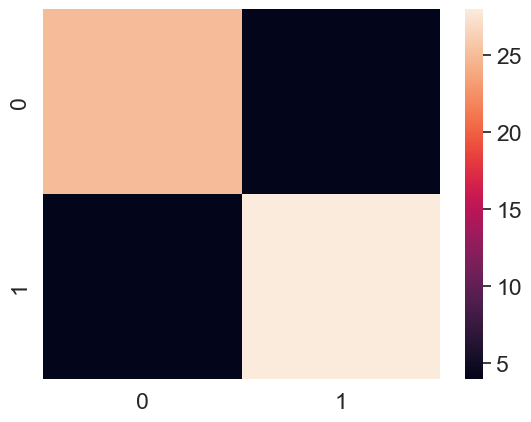

In [85]:
# Make our confusion matrix more visual using Seaborn's heatmap()
import seaborn as sns

# set the font scale
sns.set(font_scale=1.5)

# create a confusion matrix

conf_mat = confusion_matrix(Y_test, Y_preds)

# Plot it using Sweaborn

sns.heatmap(conf_mat)

### Creating a confussion matrix using scikit-learn.


In [90]:
import sklearn
sklearn.__version__

'1.3.0'

In [96]:
clf

RandomForestClassifier(n_estimators=90)

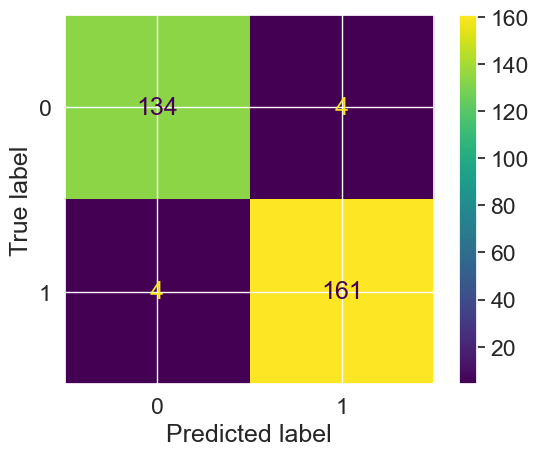

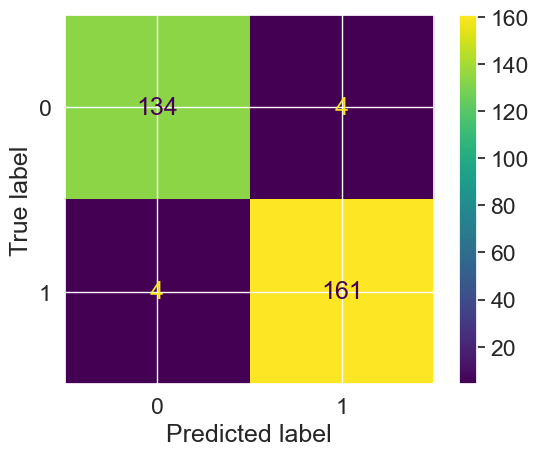

In [95]:
# Importing the ConfusionMatrixDisplay class from sklearn.metrics module
from sklearn.metrics import ConfusionMatrixDisplay

# Generating predictions using the classifier (clf) on the features (X)
Y_preds = clf.predict(X)

# Creating a ConfusionMatrixDisplay object from the predictions and true labels
# The ConfusionMatrixDisplay class provides a way to visualize confusion matrices.
# It requires predicted labels (Y_preds) and true labels (Y) as input.
# Since we already have the predicted labels (Y_preds), we can directly use them.
# Note: Make sure the classifier (clf) has been trained and fitted before making predictions.
confusion_matrix_display = ConfusionMatrixDisplay.from_predictions(y_true=Y, y_pred=Y_preds)

# Displaying the confusion matrix
confusion_matrix_display.plot()


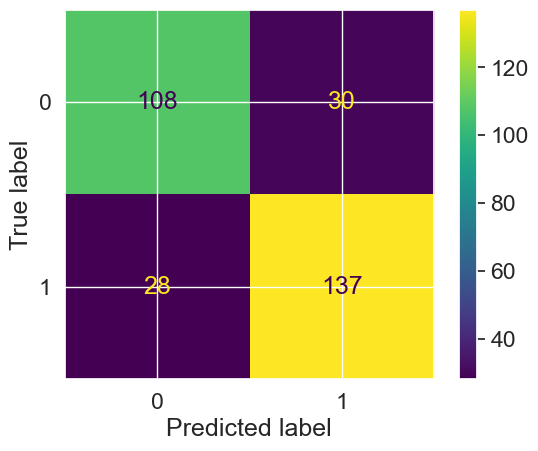

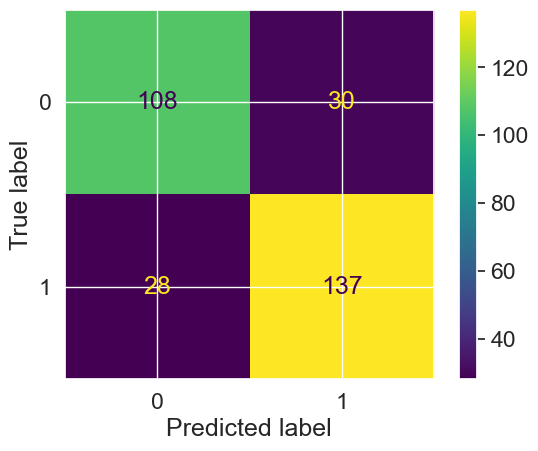

In [110]:
from sklearn.model_selection import cross_val_predict

# Perform cross-validation predictions
y_pred = cross_val_predict(clf, X, Y, cv=5)

# Import ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay

# Create ConfusionMatrixDisplay object
confusion_matrix_display = ConfusionMatrixDisplay.from_predictions(y_true=Y, y_pred=y_pred)

# Plot the confusion matrix
confusion_matrix_display.plot()
